In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\chao_gu\Anaconda3\envs\tensorflow_workshop\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np

In [3]:
IMAGE_SHAPE = (200,300)

In [4]:
from PIL import Image
import glob
image_list = []
for img in glob.glob('./test/*.png'):
    im = Image.open(img)
    im = im.resize(IMAGE_SHAPE[::-1])
    image_list.append(np.array(im))

In [5]:
image_array = np.array(image_list)

In [6]:
RGB_MEAN_PIXELS = np.array([123.68,116.779,103.939]).reshape((1,1,1,3)).astype(np.float32)

In [7]:
#num of image, height, width, depth
image_array.shape

(227, 200, 300, 3)

In [8]:
import keras

Using TensorFlow backend.


In [9]:
vgg19 = keras.applications.VGG19(weights='imagenet', include_top=False)
embedding = []
for i in image_array:
    img_input = np.expand_dims(i,0)
    keras_output = vgg19.predict(np.flip(img_input-RGB_MEAN_PIXELS,axis = -1))
    embedding.append(keras_output)

In [10]:
embedding_image = np.array(embedding)

In [11]:
embedding_image.shape

(227, 1, 6, 9, 512)

In [12]:
# similarity matrix
similarity_mat = np.zeros((embedding_image.shape[0],embedding_image.shape[0]))

In [13]:
a = embedding_image[0]
b = embedding_image[1]

In [14]:
from scipy import spatial

In [15]:
n = embedding_image.shape[0]
for i in range(n):
    img_i = embedding_image[i].flatten()
    for j in range(n):
        img_j = embedding_image[j].flatten()
        result = 1-spatial.distance.cosine(img_i,img_j)
        similarity_mat[i][j] = result

In [16]:
def similar_img(img_id, sim_mat, img_set, num_result = 1, show_sim = False):
    query = Image.fromarray(np.uint8(img_set[img_id]))
    sim_array = sim_mat[img_id]
    sim_id = np.flip(np.argsort(sim_array),axis = 0)
    target_id = sim_id[1:num_result+1]
    plt.figure(figsize=(40,40))
    ax = plt.subplot(1, num_result, 1)
    plt.imshow(query)
    i = 1
    plt.figure(figsize=(30,30))
    for _id in target_id:
        target = Image.fromarray(np.uint8(img_set[_id]))
        ax = plt.subplot(1, num_result, i)
        if show_sim == True:
            ax.set_xlabel('{} : {}'.format(_id,np.round(sim_array[_id],5)))
        i += 1
        plt.imshow(target)
        
    return

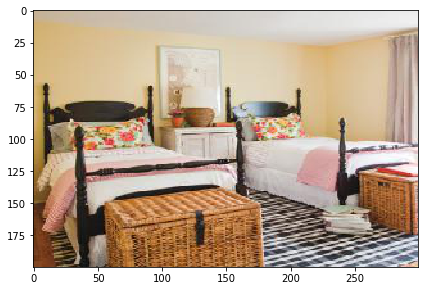

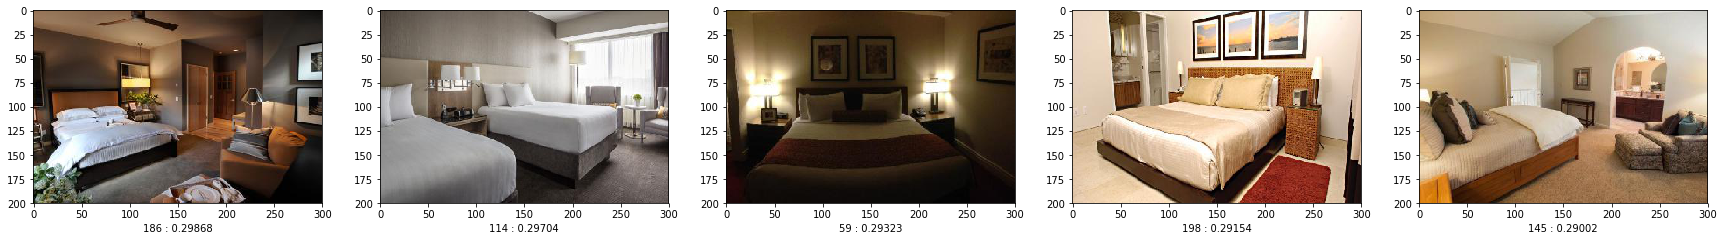

In [21]:
similar_img(171,similarity_mat,image_array, num_result=5,show_sim = True)

In [20]:
def accumulate_sim_img(img_id, sim_mat, img_set, num_result = 1, show_sim = False):
    plt.figure(figsize=(30,30))
    n = 1
    for i in img_id:
        plt.subplot(1,len(img_id),n)
        query = Image.fromarray(np.uint8(img_set[i]))
        plt.imshow(query)
        n += 1 
    sim_array = np.sum(sim_mat[img_id],axis = 0)
    #create a mask
#     print(sim_array.shape)
    mask = np.ones((sim_array.shape[0],))
    for i in img_id:
        mask[i] = 0
    sim_id = np.flip(np.argsort(sim_array[np.where(mask)]),axis = 0)
    target_id = sim_id[0:num_result]
    
    m = 1
    plt.figure(figsize=(20,20))
    for _id in target_id:
        target = Image.fromarray(np.uint8(img_set[_id]))
        ax = plt.subplot(1, num_result, m)
        if show_sim == True:
            ax.set_xlabel('{} : {}'.format(_id,np.round(sim_array[_id]/len(img_id),5)))
        m += 1
        plt.imshow(target)
        
    return

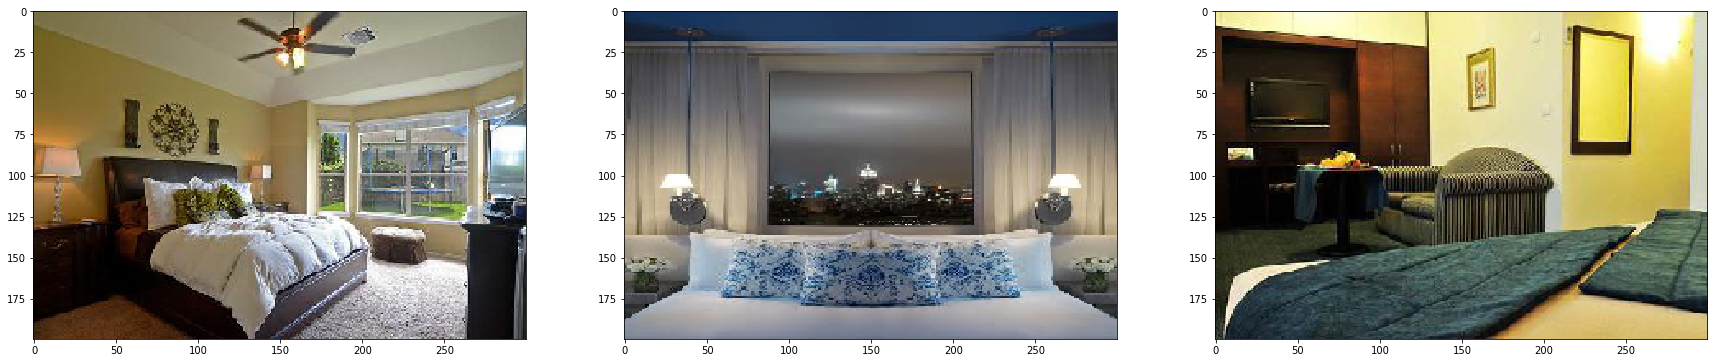

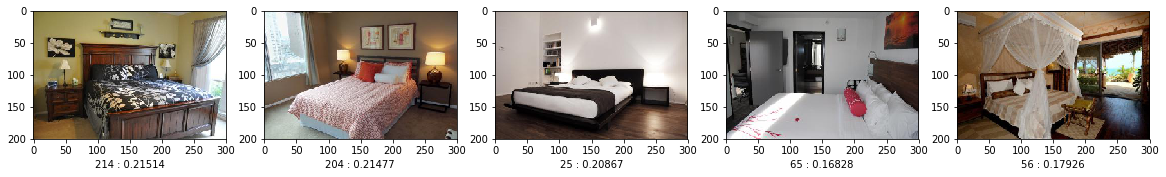

In [144]:
accumulate_sim_img([21,12,50], similarity_mat, image_array, num_result=5, show_sim=True)